# Analyse du réchauffement climatique par des data analysts. 

**L'équipe d'investigation:**
  - Fatiha M. 
  - François D. 
  - Frédéric C. 
  - Sébastien V.

## Library et connexion au drive : 

In [0]:
# importation des packages nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# connexion avec le drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Analyse de la température

Source : https://data.world/data-society/global-climate-change-data

### Importation et nettoyage des données : 



In [0]:
# Import GlobalLandTemperatures.csv
downloaded = drive.CreateFile({'id': '1d7B5tzg_pmQ453Ocoop41DP475D4Wsbx'})
downloaded.GetContentFile('GlobalLandTemperatures.csv')
dataGlobalTemp = pd.read_csv('GlobalLandTemperatures.csv')

In [0]:
dataGlobalTemp['dt'] = pd.to_datetime(dataGlobalTemp['dt'])
dataGlobalTemp['YEAR'] = pd.DatetimeIndex(dataGlobalTemp['dt']).year

dataGlobalTemp = dataGlobalTemp.set_index('dt')

df2 = dataGlobalTemp.groupby('YEAR').mean()

df2_1 = pd.DataFrame(df2['LandAndOceanAverageTemperature'])
df2_1.dropna(inplace=True)
df2 = df2_1.copy()

df2_1 = df2_1[(df2_1.index > 1959) & (df2_1.index < 2015)]

### Visualisations de l'évolution de la température :

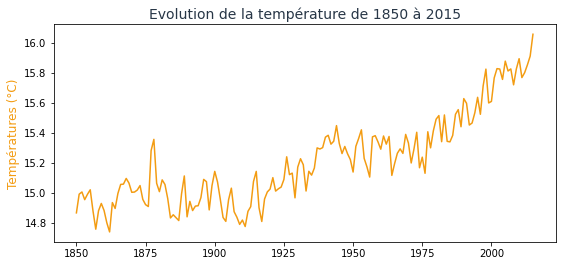

In [0]:
fig, ax1 = plt.subplots(figsize = (9, 4))
ax1.plot(df2.index, 'LandAndOceanAverageTemperature', data = df2, color = '#F39C12')
ax1.set_ylabel('Températures (°C)', {'fontsize':12, 'color':'#F39C12'})
ax1.set_title('Evolution de la température de 1850 à 2015', {'fontsize':14, 'color':'#283747'})
plt.show()

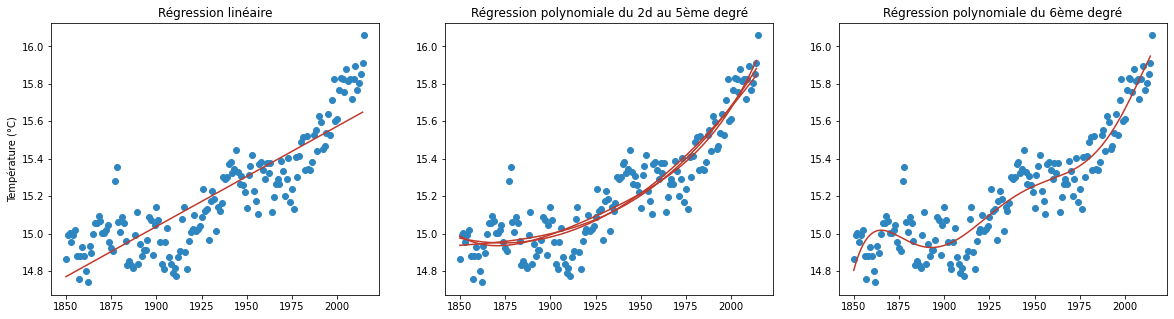

In [0]:
import numpy as np

# Paramètres du modèle
Xaxis = df2.index
Yaxis = df2['LandAndOceanAverageTemperature']
Xmin = Xaxis.min()
Xmax = Xaxis.max()
array = np.arange(Xmin, Xmax)

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].scatter(x = df2.index, y = 'LandAndOceanAverageTemperature', data = df2, c = '#2E86C1')
ax[0].plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 1))(array), c = '#C0392B')
ax[0].set_title('Régression linéaire')
ax[0].set_ylabel('Température (°C)')

ax[1].scatter(x = df2.index, y = 'LandAndOceanAverageTemperature', data = df2, c = '#2E86C1')
for i in range(2, 5):
  ax[1].plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = i))(array), c = '#C0392B')
ax[1].set_title('Régression polynomiale du 2d au 5ème degré')

ax[2].scatter(x = df2.index, y = 'LandAndOceanAverageTemperature', data = df2, c = '#2E86C1')
#ax[2].plot(df2.index, 'LandAndOceanAverageTemperature', data = df2, c = '#F39C12')
ax[2].plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 6))(array), c = '#C0392B')
ax[2].set_title('Régression polynomiale du 6ème degré')

plt.show()

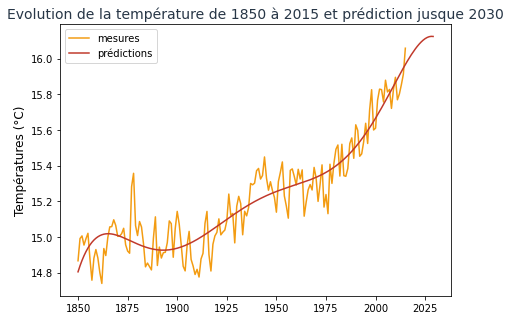

In [0]:
fig, ax = plt.subplots(figsize = (7, 5))
array = np.arange(Xmin, 2030)
_ = plt.plot(df2.index, 'LandAndOceanAverageTemperature', data = df2, c = '#F39C12')
_ = plt.plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 6))(array), c = '#C0392B')
plt.ylabel('Températures (°C)', {'fontsize':12})
plt.title('Evolution de la température de 1850 à 2015 et prédiction jusque 2030', {'fontsize':14, 'color':'#283747'})
plt.legend(['mesures', 'prédictions'])
plt.show()

## Analyse du CO2

Source : https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

### Importation et nettoyage des données : 

In [0]:
## PPM 
downloaded = drive.CreateFile({'id': '1UoLzlwDYNl3Y0Pk1ES-7e18TrSswhD20'})
downloaded.GetContentFile('co2-ppm-daily.csv')
dataCO2ppm = pd.read_csv('co2-ppm-daily.csv')
dataCO2ppm['date'] = pd.to_datetime(dataCO2ppm['date'])

In [0]:
## Emission de CO2 
downloaded = drive.CreateFile({'id': '1puvKwBbcCz5FmckzUNw0ZQX44aG9l9wj'})
downloaded.GetContentFile('Emission_CO2(kt).csv')
dataCO2emissions = pd.read_csv('Emission_CO2(kt).csv')

country_list = ['World', 'China', 'United States', 'European Union', 'India', 'Russian Federation', 'Japan', 'Germany', 'Iran', 'Saudi Arabia', 'Canada', 'France']
plt_data = dataCO2emissions[dataCO2emissions['Country Name'].isin(country_list)]
plt_data['CO2 (Gt)'] = plt_data['Value']*1e-6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Visualisations de l'évolution du CO2 

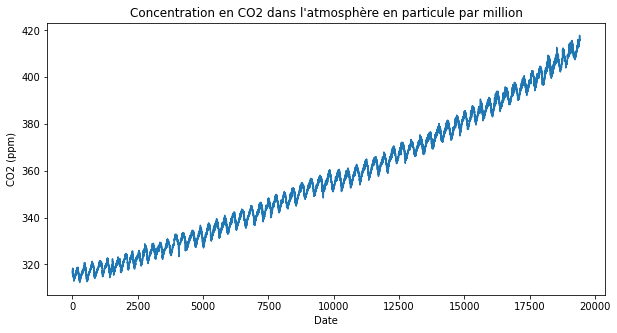

In [0]:
plt.figure(figsize=(10, 5))
plt.plot(dataCO2ppm.index, dataCO2ppm['value'])
plt.title("Concentration en CO2 dans l'atmosphère en particule par million")
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.show()

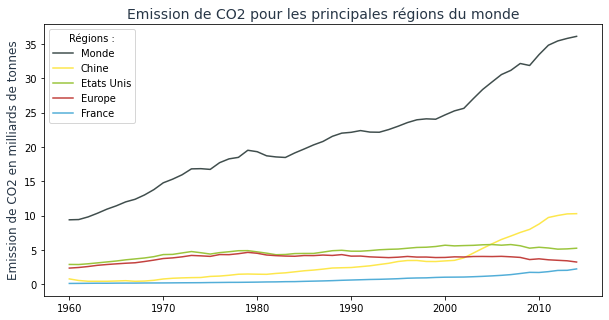

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

for country, color in zip(['World', 'China', 'United States', 'European Union', 'India'], 
                          ['#404E4D', '#FDE74C', '#9BC53D', '#C3423F', '#52AED8']):
  _ = plt.plot('Year', 'CO2 (Gt)', data = plt_data[plt_data['Country Name'] == country], c = color)
plt.title('Emission de CO2 pour les principales régions du monde', {'fontsize':14, 'color':'#283747'})
plt.legend(title = 'Régions :', labels = ['Monde', 'Chine', 'Etats Unis', 'Europe', 'France'])
plt.xlabel('')
plt.ylabel('Emission de CO2 en milliards de tonnes', {'fontsize':12, 'color':'#283747'})
plt.show()

In [0]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

_ = figure(plot_width=600, plot_height=320, title="Emission de CO2 pour les principales régions du monde")

for country, color in zip(['World', 'China', 'United States', 'European Union', 'India'], 
                          ['#404E4D', '#FDE74C', '#9BC53D', '#C3423F', '#52AED8']):
  _.line(plt_data['Year'][plt_data['Country Name'] == country], plt_data['CO2 (Gt)'][plt_data['Country Name'] == country], line_width=2, color = color, legend_label = country)
_.yaxis.axis_label = 'Emission de CO2 en milliards de tonnes'
_.legend.title = "Régions"
_.legend.location = 'top_left'
_.legend.click_policy = "hide"

show(_)

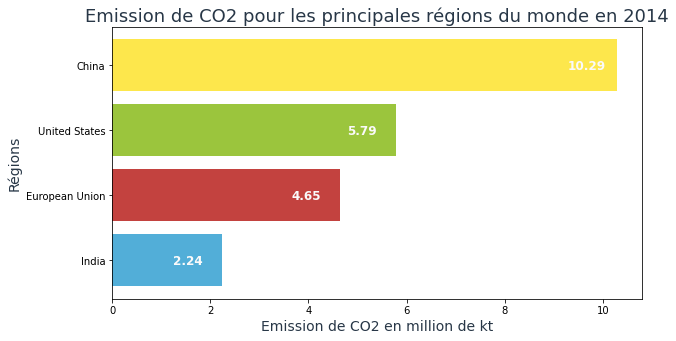

In [0]:
plt_data_b = plt_data[plt_data['Year'] == 2014]

fig, ax = plt.subplots(figsize = (9.5, 5))
for country, color in zip(['India', 'European Union', 'United States', 'China'], 
                          ['#52AED8', '#C3423F', '#9BC53D', '#FDE74C']):
  x = country
  y = plt_data['CO2 (Gt)'][plt_data['Country Name'] == country]
  plt.barh(x, y, color = color)
  plt.text(max(y)-1, x, str(round(max(y), 2)), color = '#FAFAFA', va='center', fontweight='bold', fontsize = 12)

plt.title('Emission de CO2 pour les principales régions du monde en 2014', {'fontsize':18, 'color':'#283747'})
plt.xlabel('Emission de CO2 en million de kt', {'fontsize':14, 'color':'#283747'})
plt.ylabel('Régions', {'fontsize':14, 'color':'#283747'})

plt.show()

## Corrélation entre augmentation de la température et du CO2

### Merging les dataframes température et émission de CO2

In [0]:
df1 = dataCO2emissions[dataCO2emissions['Country Name'] == 'World']
df1.rename(columns={"Year": "YEAR", 'Value':'CO2'}, inplace=True)
df1.set_index('YEAR', inplace=True)

df2_1 = df2_1.rename(columns={'LandAndOceanAverageTemperature':'Global_Avg_Temp'})
df_co2_temp = df1.merge(df2_1, left_index=True, right_index=True)

df_co2_temp['CO2 (Gt)'] = df_co2_temp['CO2']*1e-7

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


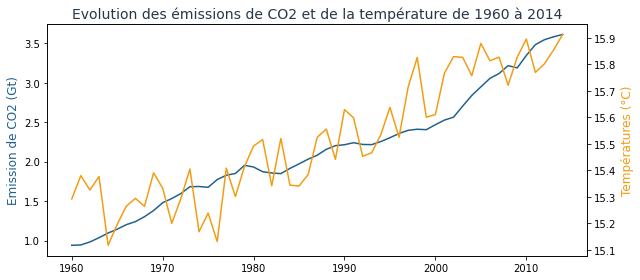

In [0]:
fig, ax1 = plt.subplots(figsize = (9, 4))
ax1.plot(df_co2_temp.index, 'CO2 (Gt)', data = df_co2_temp, color = '#1F618D')
ax1.set_ylabel('Emission de CO2 (Gt)', {'fontsize':12, 'color':'#1F618D'})

ax2 = ax1.twinx()
ax2.plot(df_co2_temp.index, 'Global_Avg_Temp', data = df_co2_temp, color = '#F39C12')
ax2.set_ylabel('Températures (°C)', {'fontsize':12, 'color':'#F39C12'})
ax1.set_title('Evolution des émissions de CO2 et de la température de 1960 à 2014', {'fontsize':14, 'color':'#283747'})
fig.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


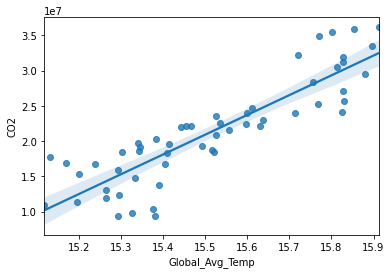

In [0]:
import seaborn as sns
sns.regplot('Global_Avg_Temp', 'CO2', data = df_co2_temp)
plt.show()

## Analyse de la consommation d'énergie 

### Importation et nettoyage des données : 



In [0]:
downloaded = drive.CreateFile({'id': '138HThhJnZ2huay55IG29WV768a92_f1D'})
downloaded.GetContentFile('bp-stats-review-2019-all-data.xlsx')
cons_energie = pd.read_excel("bp-stats-review-2019-all-data.xlsx", 'Primary Energy Consumption', skiprows = [0, 3], header = 1)

cons_energie = cons_energie.drop(cons_energie.index[110:117],0, inplace= False)
cons_energie = cons_energie.drop(['2018.1',	'2007-17',	'2018.2',	'Unnamed: 58',	'Unnamed: 59'], axis = 1)

cons_energie = cons_energie.dropna(how='all', inplace = False)

cons_energie = cons_energie.set_index('Million tonnes oil equivalent')

energieMonde = pd.DataFrame(cons_energie[cons_energie.index == 'Total World'])

energieMonde['YEAR'] = 'Energie Totale'
energieMonde.set_index('YEAR', inplace=True)
energieMonde = energieMonde.T

In [0]:
energieMonde = pd.DataFrame(cons_energie[cons_energie.index == 'Total World'])

energieMonde['YEAR'] = 'Energie Totale'
energieMonde.set_index('YEAR', inplace=True)
energieMonde = energieMonde.T

In [0]:
energieNorth_America = pd.DataFrame(cons_energie[cons_energie.index == 'Total North America'])
energieNorth_America
energieNorth_America['YEAR'] = 'Energie North America'
energieNorth_America.set_index('YEAR', inplace=True)
energieNorth_America = energieNorth_America.T

In [0]:
energieUS = pd.DataFrame(cons_energie[cons_energie.index == 'US'])

energieUS['YEAR'] = 'Energie US'
energieUS.set_index('YEAR', inplace=True)
energieUS = energieUS.T

In [0]:
energieEurope = pd.DataFrame(cons_energie[cons_energie.index == 'Total Europe'])
energieEurope['YEAR'] = 'Energie Europe'
energieEurope.set_index('YEAR', inplace=True)
energieEurope = energieEurope.T

In [0]:
energieAfrique = pd.DataFrame(cons_energie[cons_energie.index == 'Total Africa'])
energieAfrique['YEAR'] = 'Energie Afrique'
energieAfrique.set_index('YEAR', inplace=True)
energieAfrique = energieAfrique.T

In [0]:
energieAsiePacific = pd.DataFrame(cons_energie[cons_energie.index == 'Total Asia Pacific'])
energieAsiePacific['YEAR'] = 'Energie Asie Pacifique'
energieAsiePacific.set_index('YEAR', inplace=True)
energieAsiePacific = energieAsiePacific.T

### Visualisations de l'évolution de la consommation énergétique

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


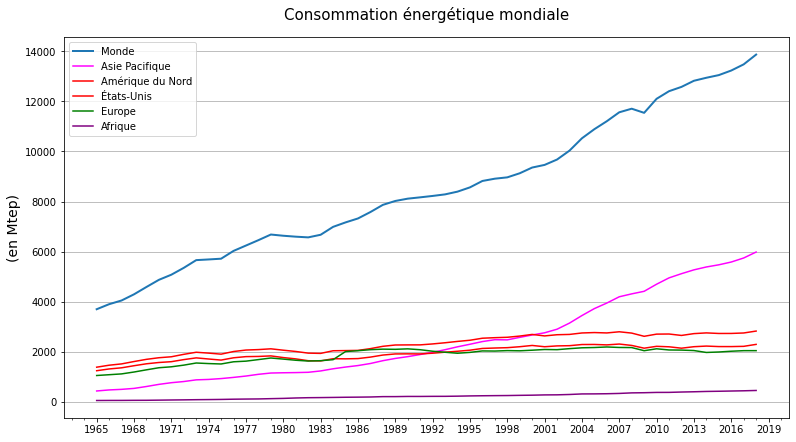

In [0]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.figure(figsize=(13, 7))

# Consommation mondiale d'énergie 
plt.plot(energieMonde.index, energieMonde['Energie Totale'], lw = 2, label = 'Monde')
plt.title("Consommation énergétique mondiale", y = 1.03, fontsize=15)
plt.ylabel('(en Mtep)', fontsize=14)
plt.xticks()


#Consommation d'énergie Asie Pacifique
plt.plot(energieAsiePacific.index, energieAsiePacific['Energie Asie Pacifique'], c= 'magenta', label = 'Asie Pacifique')

# Consommation d'énergie North America
plt.plot(energieNorth_America.index, energieNorth_America['Energie North America'], c = 'red', label= 'Amérique du Nord')

# Consommation d'énergie US
plt.plot(energieUS.index, energieUS['Energie US'], c = 'red', label= 'États-Unis' )

#Consommation d'énergie Europe
plt.plot(energieEurope.index, energieEurope['Energie Europe'], c = 'green', label = 'Europe')

#Consommation d'énergie Afrique
plt.plot(energieAfrique.index, energieAfrique['Energie Afrique'], c = 'purple', label = 'Afrique')


ax = plt.axes()
ax.xaxis.set_major_locator(MultipleLocator(3))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.legend()
plt.grid(which='major', axis='y')

plt.show()

## Analyse de la population 

Source : https://data.worldbank.org/indicator/SP.POP.TOTL

### Importation et nettoyage des données : 



In [0]:
#Database Population Mondial 1960-2018
downloaded = drive.CreateFile({'id': '1WRAnnYVo4JR-_10DhWNIDhE1wKUXiG2q'})
downloaded.GetContentFile('API_SP.POP.TOTL_DS2_fr_csv_v2_937567.csv')
pop = pd.read_csv("API_SP.POP.TOTL_DS2_fr_csv_v2_937567.csv", skiprows = [0, 3], header = 1)

pop = pop.drop(['Country Code',	'Indicator Name',	'Indicator Code',	'1960',	'1961',	'1962',	'1963',	'1964', '2019', 'Unnamed: 64'], axis = 1)
pop = pop.set_index('Country Name')

popMonde = pd.DataFrame(pop[pop.index == 'Monde'])
popMonde['YEAR'] = 'Population Totale'
popMonde.set_index('YEAR', inplace=True)
popMonde = popMonde.T

### Visualisations de l'évolution de la population

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


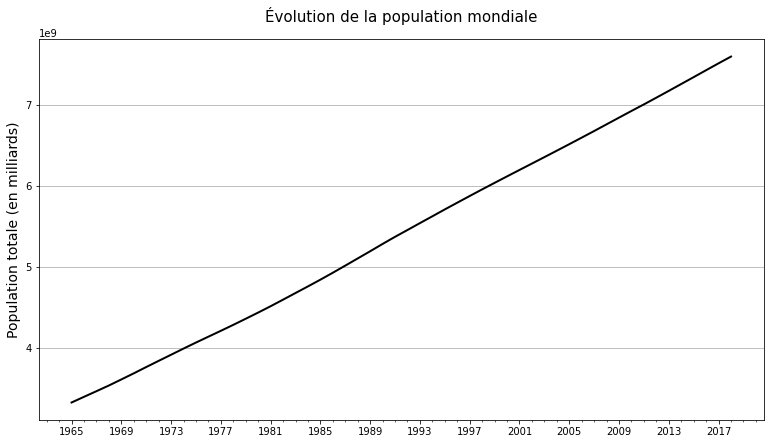

In [0]:
plt.figure(figsize=(13, 7))
plt.plot(popMonde.index, popMonde['Population Totale'], lw = 2, c= 'black')
plt.title("Évolution de la population mondiale", y = 1.03, fontsize=15)


plt.ylabel('Population totale (en milliards)', fontsize=14)
plt.xticks()


ax = plt.axes()
ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(MultipleLocator(1))

plt.grid(which='major', axis='y')

plt.show()

## Evolution de la population et de la consommation d'énergie

In [0]:
popMonde['YEAR'] = pd.to_numeric(popMonde.index)

In [0]:
energieMonde['YEAR'] = pd.to_numeric(energieMonde.index)

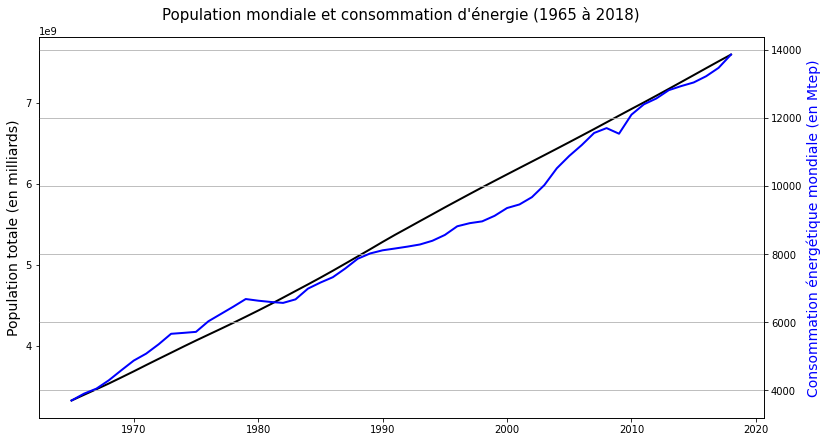

In [0]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


fig, ax1 = plt.subplots(figsize=(13, 7))
ax1.plot(popMonde['YEAR'], popMonde['Population Totale'], lw = 2, c= 'black')
ax1.set_title("Population mondiale et consommation d'énergie (1965 à 2018)", y = 1.03, fontsize=15)
ax1.set_ylabel('Population totale (en milliards)', fontsize=14, color= 'black')


ax2 = ax1.twinx()
ax2.plot(energieMonde['YEAR'], energieMonde['Energie Totale'], lw = 2, color = 'blue')
ax2.set_ylabel('Consommation énergétique mondiale (en Mtep)', fontsize=14, color = 'blue')


#ax = plt.axes()
#ax.xaxis.set_major_locator(MultipleLocator(4))
#ax.xaxis.set_minor_locator(MultipleLocator(1))

plt.grid(which='major', axis='y')

plt.show()

## Analyse de la fonte des glaciers

Source : http://www3.epa.gov/climatechange/science/indicators/snow-ice/glaciers.

In [0]:
glacier = pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/glaciers_fig-1.csv',sep=',', skiprows=[0,1,2,3,4,5])

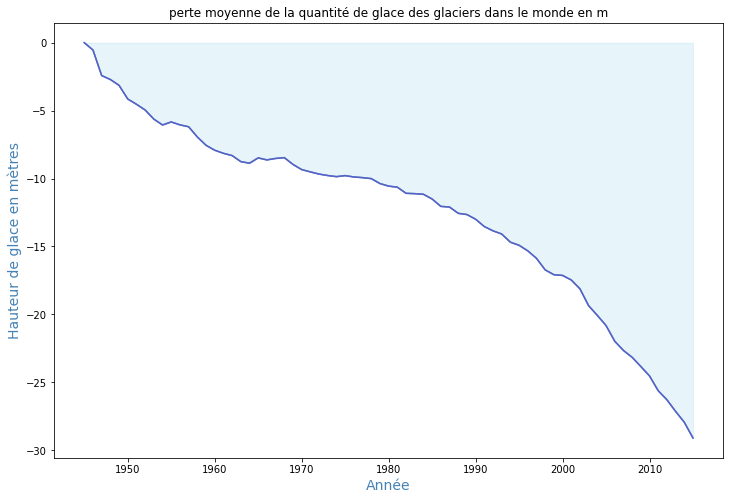

In [0]:
plt.figure(figsize=(12, 8))
axes = plt.axes()
#axes.grid()
x=glacier['Year']
y=glacier['Mean cumulative mass balance']
plt.plot(x, y)
plt.fill_between(x,y , color="skyblue", alpha=0.2)
plt.plot(x, y, color="Slateblue", alpha=0.8)
plt.xlabel("Année", {'fontsize':14, 'color':'steelblue'})
plt.ylabel("Hauteur de glace en mètres", {'fontsize':14, 'color':'steelblue'})

plt.figure
plt.title("perte moyenne de la quantité de glace des glaciers dans le monde en m")
plt.show()

## Analyse du niveau des mers

Source : https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level

In [0]:
# Import sealevel.csv > 1883-present date compared to average of 1993-2008
downloaded = drive.CreateFile({'id': '1FE1IWOr3vKFgJ4lChV0TmSIk6unwZKyY'})
downloaded.GetContentFile('sealevel.csv')
dataSEA = pd.read_csv('sealevel.csv')

dataSEA['Year'] = dataSEA['Time'].apply(lambda x: x[:4])
dataSEA = dataSEA.groupby('Year').mean()

df1 = pd.DataFrame({'change_mm':dataSEA['CW_change_mm'], 'Lab':'CW',  'Year':dataSEA['CW_change_mm'].index})
df2 = pd.DataFrame({'change_mm':dataSEA['UHSLCFD_change_mm'], 'Lab':'UHSLCFD', 'Year':dataSEA['UHSLCFD_change_mm'].index})

dataSEA = pd.concat([df1, df2])

# model 
Xaxis = dataSEA[dataSEA['Lab'] == 'CW'].index
Yaxis = dataSEA['change_mm'][dataSEA['Lab'] == 'CW']
array = np.arange(1880, 2020)

### Visualisation du niveau des mers et océans

In [0]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

_ = figure(plot_width=900, plot_height=450, title="Augmentation du niveau des mers et océans de 1880 à nos jours (par rapport au niveau moyen de 1993-2008)")
for lab, color in zip(['CW', 'UHSLCFD'], 
                      ['#27496D', '#52AED8']):
  _.line(dataSEA['Year'][dataSEA['Lab'] == lab], dataSEA['change_mm'][dataSEA['Lab'] == lab], line_width=2, color = color, legend_label = lab)
#_.line(x = np.arange(1880, 2020, 1), y = 0, color = '#C3423F', line_width=4, legend_label = 'niveau moyen (1993 à 2008)')
#_.line(x = array, y =  np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 1))(array), color = '#C0392B', legend_label = 'prédictions', alpha = .5)

_.yaxis.axis_label = 'Elévation (en mm)'
_.legend.title = "Mesures"
_.legend.location = 'top_left'
_.legend.click_policy = "hide"
show(_)

## Analyses de la surface des fôrets et des terres agricoles

Source : https://data.worldbank.org/indicator/AG.LND.FRST.K2

Source : https://data.worldbank.org/indicator/AG.LND.AGRI.K2

### Importation et nettoyage des données

In [0]:
#Base de donnée foret
downloaded = drive.CreateFile({'id': '13IDmojFEIUJys7nYBpO6gsDkgpYP7aov'})
downloaded.GetContentFile('13IDmojFEIUJys7nYBpO6gsDkgpYP7aov')
foret = pd.read_csv("13IDmojFEIUJys7nYBpO6gsDkgpYP7aov", skiprows=3) 

#Base de donnée Agricole
downloaded = drive.CreateFile({'id': '1DWYXI77EN8mNbHCZdaibNdRa9sicqjku'})
downloaded.GetContentFile('1DWYXI77EN8mNbHCZdaibNdRa9sicqjku')
agri = pd.read_csv("1DWYXI77EN8mNbHCZdaibNdRa9sicqjku", skiprows=3) 

In [0]:
#Nettoyage et mise en forme données Foret
foret = foret.drop(["Country Code","Indicator Name","Indicator Code","Unnamed: 64"], axis=1)
foret = foret.T
foret.columns = foret.iloc[0]
foret = foret.iloc[1:]


In [0]:
#Création dataframe Monde
foret_monde = pd.DataFrame(foret['Monde'])
foret_monde.rename(columns={'Monde': "Surf"}, inplace = True)
foret_monde['Region'] = 'Monde'
foret_monde['Surf'] = foret_monde['Surf']*1e-6

In [0]:
#Création dataframe Brésil
foret_bresil = pd.DataFrame(foret['Brésil'])
foret_bresil.rename(columns={'Brésil': "Surf"}, inplace = True)
foret_bresil['Region'] = 'Brésil'
foret_bresil['Surf'] = foret_bresil['Surf']

In [0]:
#Union des deux dataframe Brésil et Monde
data_foret = pd.concat([foret_monde, foret_bresil])
data_foret = data_foret.dropna(axis=0)
data_foret['Surf'] = pd.to_numeric(data_foret['Surf'])

In [0]:
#Nettoyage et mise en forme données Agricole
agri = agri.drop(["Country Code","Indicator Name","Indicator Code","Unnamed: 64"], axis=1)
agri = agri.T
agri.columns = agri.iloc[0]
agri = agri.iloc[1:]

In [0]:
#Création dataframe Monde
agri_monde = pd.DataFrame(agri['Monde'])
agri_monde.rename(columns={'Monde': "Surf"}, inplace = True)
agri_monde['Region'] = 'Monde'
agri_monde['Surf'] = agri_monde['Surf']*1e-6

In [0]:
#Création dataframe Brésil
agri_bresil = pd.DataFrame(agri['Brésil'])
agri_bresil.rename(columns={'Brésil': "Surf"}, inplace = True)
agri_bresil['Region'] = 'Brésil'
agri_bresil['Surf'] = agri_bresil['Surf']

In [0]:
#Union des deux dataframe Brésil et Monde
data_agri = pd.concat([agri_monde, agri_bresil])
data_agri = data_agri.dropna(axis=0)
#data_agri = data_agri.drop()
data_agri['Surf'] = pd.to_numeric(data_agri['Surf'])

In [0]:
data_foret['Year'] = pd.to_numeric(data_foret.index)
data_agri['Year'] = pd.to_numeric(data_agri.index)
#data_agri[data_agri['Region'] == 'Monde'].index

In [0]:
data_agri['Year'] = pd.to_numeric(data_agri.index)

### Visualisation des surfaces agricoles

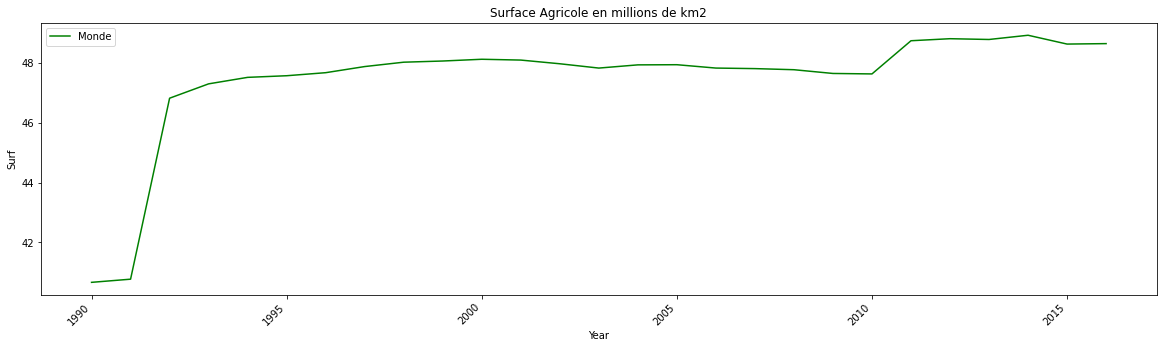

In [0]:
#Création graph "Surface Agricole en millions de km2"
import seaborn as sns
plt.figure(figsize=(20,5))
sns.lineplot(x = 'Year', y = 'Surf', data = data_agri[(data_agri['Region'] == 'Monde') & (data_agri['Year'] > 1989)], color='green', label = "Monde")
plt.title("Surface Agricole en millions de km2")
plt.xticks(rotation = 45, ha = "right")
plt.show()

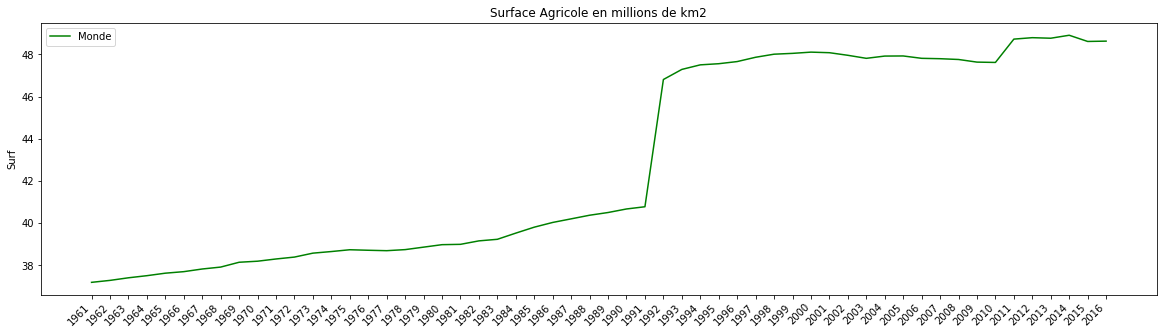

In [0]:
#Création graph "Surface Agricole en millions de km2"
plt.figure(figsize=(20,5))
sns.lineplot(x =data_agri[data_agri['Region'] == 'Monde'].index, y = 'Surf', data = data_agri[data_agri['Region'] == 'Monde'], color='green', label = "Monde")
plt.title("Surface Agricole en millions de km2")
plt.xticks(rotation = 45, ha = "right")
plt.show()

### Visualisation des surfaces agricoles

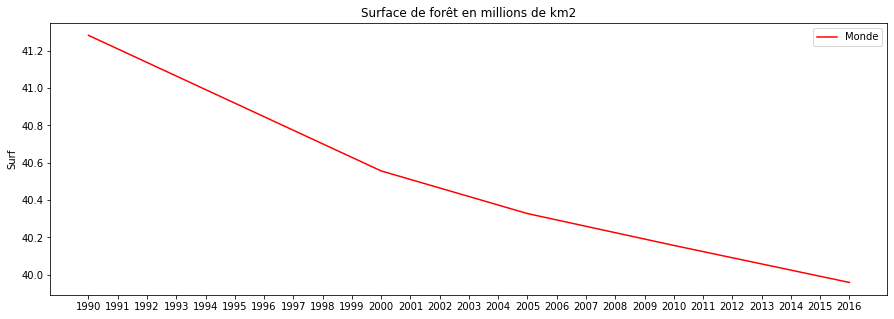

In [0]:
plt.figure(figsize=(15,5))
sns.lineplot(x = data_foret[data_foret['Region'] == 'Monde'].index, y = 'Surf', data = data_foret[data_foret['Region'] == 'Monde'], color='r',label = "Monde")
plt.title("Surface de forêt en millions de km2")
plt.show()

### Visualisation de l'évolution des surfaces agricoles et forestières

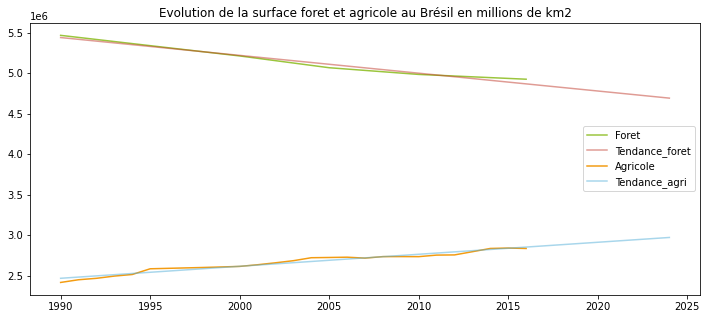

In [0]:
#Graphes comparatif avec prédiction pour le brésil
# Paramètres du modèle

df = data_foret[data_foret['Region'] == 'Brésil']
df1 = data_agri[(data_agri['Region'] == 'Brésil')& (data_agri['Year'] > 1989)]

Xaxis = df['Year']
Yaxis = df['Surf']
Xmin = Xaxis.min()
Xmax = Xaxis.max()
array = np.arange(Xmin, 2025)

Xaxis1 = df1['Year']
Yaxis1 = df1['Surf']
Xmin1 = Xaxis1.min()
Xmax1 = Xaxis1.max()
array1 = np.arange(Xmin1, 2025)

fig, ax = plt.subplots(figsize = (12, 5))
_ = plt.plot('Year', 'Surf', data = df, c = '#9BC53D')
_ = plt.plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 1))(array), c = '#C0392B', alpha = .5)
_ = plt.plot('Year', 'Surf', data = df1, c = '#F39C12')
_ = plt.plot(array1, np.poly1d(np.polyfit(x = Xaxis1, y = Yaxis1, deg = 1))(array1), c = '#52AED8', alpha = .5)
_=plt.legend(labels = ['Foret', 'Tendance_foret', 'Agricole', 'Tendance_agri'])
_=plt.title("Evolution de la surface foret et agricole au Brésil en millions de km2")
plt.show()


### Visualisation des surfaces forestières

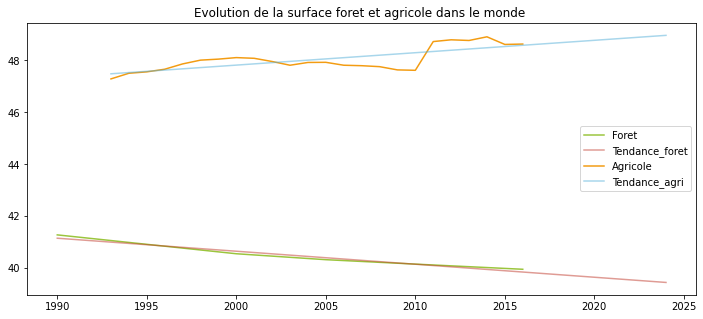

In [0]:
#Graphes comparatif avec prédiction pour monde
# Paramètres du modèle

df = data_foret[data_foret['Region'] == 'Monde']
df1 = data_agri[(data_agri['Region'] == 'Monde')& (data_agri['Year'] > 1992)]

Xaxis = df['Year']
Yaxis = df['Surf']
Xmin = Xaxis.min()
Xmax = Xaxis.max()
array = np.arange(Xmin, 2025)

Xaxis1 = df1['Year']
Yaxis1 = df1['Surf']
Xmin1 = Xaxis1.min()
Xmax1 = Xaxis1.max()
array1 = np.arange(Xmin1, 2025)

fig, ax = plt.subplots(figsize = (12, 5))
_ = plt.plot('Year', 'Surf', data = df, c = '#9BC53D')
_ = plt.plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 1))(array), c = '#C0392B', alpha = .5)
_ = plt.plot('Year', 'Surf', data = df1, c = '#F39C12')
_ = plt.plot(array1, np.poly1d(np.polyfit(x = Xaxis1, y = Yaxis1, deg = 1))(array1), c = '#52AED8', alpha = .5)
_=plt.legend(labels = ['Foret', 'Tendance_foret', 'Agricole', 'Tendance_agri'])
_=plt.title("Evolution de la surface foret et agricole dans le monde ")
plt.show()

In [0]:
data = data_agri[data_agri['Region'] == 'Monde'].merge(data_foret[data_foret['Region'] == 'Monde'], left_on = 'Year', right_on = 'Year', suffixes = ('_agr', '_frt'))

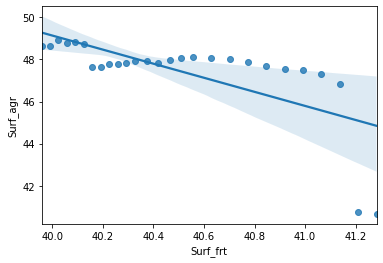

In [0]:
sns.regplot(x = 'Surf_frt', y = 'Surf_agr', data = data)
plt.show()